In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

/home/user01/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.012034,-0.104246,1.047006,0.295731,-2.723424,1
1,-0.446420,-1.284897,-3.367289,-1.153396,-1.873704,0
2,-1.711062,-2.126668,1.569034,-1.249356,-0.475660,1
3,0.320632,1.586403,0.863114,1.343401,-2.794651,1
4,-0.022273,-0.854807,-2.171592,-1.691752,-2.014952,0


In [4]:
# function for row sampling (with replacement)

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [10]:
# function for feature sampling
import random
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [39]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

## Row sampling (with replacement)

In [8]:
df1 = sample_rows(df, 0.2)
df2 = sample_rows(df, 0.2)
df3 = sample_rows(df, 0.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [10]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [11]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'x[2] <= 1.849\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.5, 0.625, 'x[3] <= -0.106\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= -0.839\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

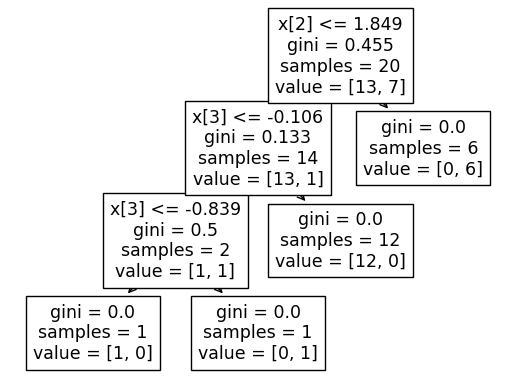

In [12]:
plot_tree(clf1)

[Text(0.6, 0.875, 'x[2] <= 0.06\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.4, 0.625, 'x[0] <= 1.459\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6, 0.375, 'x[1] <= -1.994\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

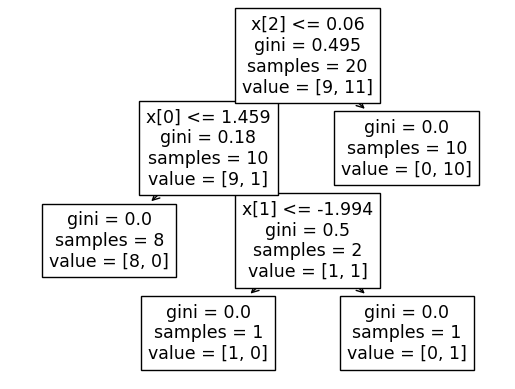

In [13]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[2] <= -0.104\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6, 0.5, 'x[0] <= 0.985\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

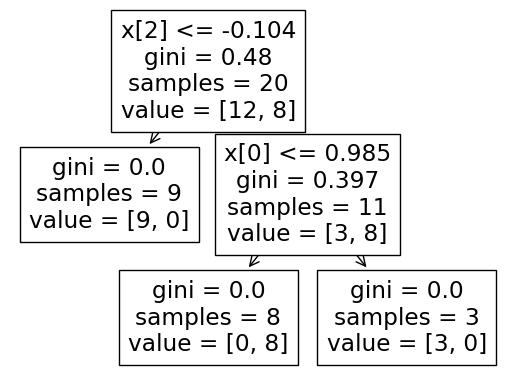

In [14]:
plot_tree(clf3)

In [15]:
df1.head(1)

,col1,col2,col3,col4,col5,target
90,1.235981,-0.677863,-2.362776,0.678358,-1.213154,0


In [16]:
clf1.predict(np.array([1.75929,0.175617,-2.377137,-0.996209,0.714512]).reshape(1,5))

array([0])

In [17]:
clf2.predict(np.array([1.75929,0.175617,-2.377137,-0.996209,0.714512]).reshape(1,5))

array([1])

In [18]:
clf3.predict(np.array([1.75929,0.175617,-2.377137,-0.996209,0.714512]).reshape(1,5))

array([0])

**we have predict the 3 decision tree and take majority and final output is 0.**

## Feature sampling

In [23]:
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

In [24]:
df1.head(1)

,col4,col2,col5,col1,target
0,0.295731,-0.104246,-2.723424,-2.012034,1


In [25]:
df2.head(1)

,col1,col5,col4,col2,target
0,-2.012034,-2.723424,0.295731,-0.104246,1


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [27]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.39285714285714285, 0.9285714285714286, 'x[3] <= -0.481\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.14285714285714285, 0.7857142857142857, 'x[2] <= -4.095\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.07142857142857142, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.6428571428571429, 'x[3] <= -0.659\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.2857142857142857, 0.5, 'x[2] <= -1.72\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.21428571428571427, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6428571428571429, 0.7857142857142857, 'x[1] <= 0.444\ngini = 0.375\nsamples = 64\nvalue = [48, 16]'),
 Text(0.5714285714285714, 0.6428571428571429, 'x[2] <= -1.297\ngini = 0.303\nsamples = 59\nvalue = [48, 11]'),
 

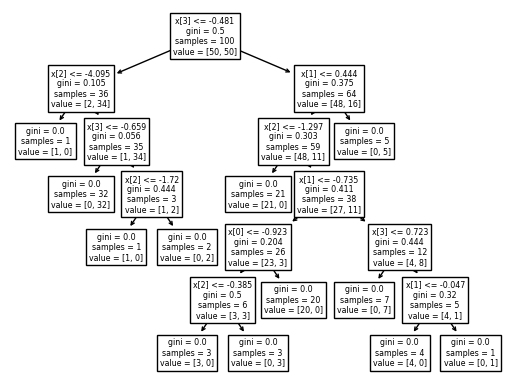

In [28]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.39285714285714285, 0.9444444444444444, 'x[0] <= -0.481\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.14285714285714285, 0.8333333333333334, 'x[1] <= -4.095\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.07142857142857142, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.7222222222222222, 'x[0] <= -0.659\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(0.14285714285714285, 0.6111111111111112, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.2857142857142857, 0.6111111111111112, 'x[0] <= -0.582\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.21428571428571427, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6428571428571429, 0.8333333333333334, 'x[3] <= 0.444\ngini = 0.375\nsamples = 64\nvalue = [48, 16]'),
 Text(0.5714285714285714, 0.7222222222222222, 'x[1] <= -1.297\ngini = 0.303\nsamples = 59\nvalue = [48, 11]'),
 T

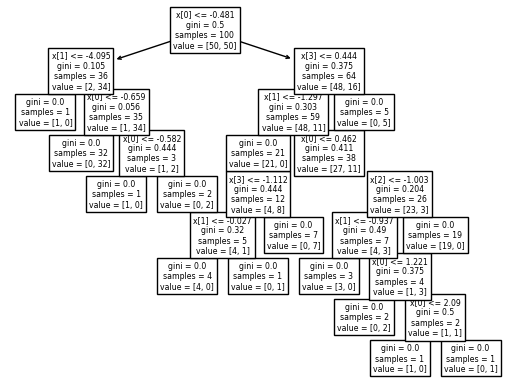

In [29]:
plot_tree(clf2)

In [32]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col2', 'col5', 'col1', 'target'], dtype='object')
Index(['col1', 'col5', 'col4', 'col2', 'target'], dtype='object')
Index(['col3', 'col2', 'col1', 'col4', 'target'], dtype='object')


In [34]:
df1.head(2)

,col4,col2,col5,col1,target
0,0.295731,-0.104246,-2.723424,-2.012034,1
1,-1.153396,-1.284897,-1.873704,-0.446420,0


In [35]:
clf1.predict(np.array([-1.153396,-1.284897,-1.873704,-0.446420]).reshape(1,4))

array([0])

In [36]:
clf2.predict(np.array([-1.153396,-1.284897,-1.873704,-0.446420]).reshape(1,4))

array([1])

In [37]:
clf3.predict(np.array([-1.153396,-1.284897,-1.873704,-0.446420]).reshape(1,4))

array([0])

**we have predict the 3 decision tree and take majority and final output is 0.**

## Combined sampling

In [40]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

In [41]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col4', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')


In [42]:
df3

,col5,col4,target
63,-2.798237,-2.613952,0
12,-0.331360,0.005950,1
85,0.286826,-0.060695,1
33,-1.774028,-1.511520,1
84,-2.273477,-0.860651,1
59,-2.961554,-0.473585,1
38,-1.303156,-1.111636,0
43,-2.560404,0.580721,1
14,0.101120,-0.158529,0
42,-0.689467,-0.273516,0


In [43]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [44]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [45]:
from sklearn.tree import plot_tree

[Text(0.6964285714285714, 0.9285714285714286, 'x[0] <= 0.218\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.625, 0.7857142857142857, 'x[1] <= 0.038\ngini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(0.39285714285714285, 0.6428571428571429, 'x[0] <= -1.655\ngini = 0.498\nsamples = 32\nvalue = [15, 17]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= -1.869\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.07142857142857142, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.21428571428571427, 0.35714285714285715, 'x[1] <= -2.57\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6428571428571429, 0.5, 'x[1] <= -1.033\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.5, 0.35714285714285715, 'x[0] <= 0.108\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.428

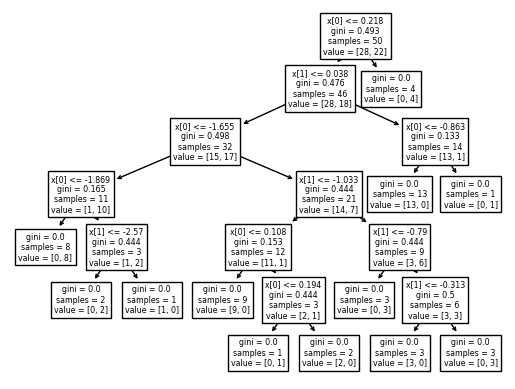

In [46]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[1] <= -1.098\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3, 0.7, 'x[0] <= -0.628\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(0.2, 0.5, 'x[1] <= -1.551\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3, 0.3, 'x[1] <= -1.502\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7, 0.7, 'x[0] <= -0.975\ngini = 0.453\nsamples = 26\nvalue = [9, 17]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.8, 0.5, 'x[1] <= -1.003\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.7, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

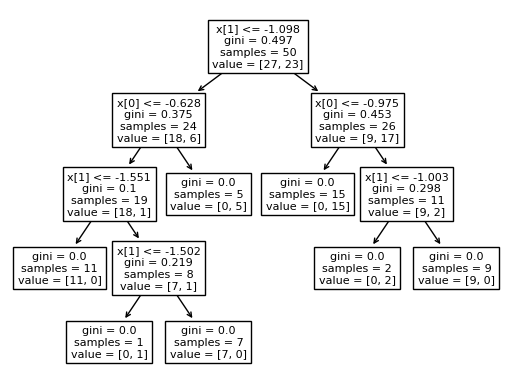

In [47]:
plot_tree(clf2)

[Text(0.2867647058823529, 0.9285714285714286, 'x[1] <= -1.588\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.11764705882352941, 0.7857142857142857, 'x[0] <= -1.082\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.058823529411764705, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.17647058823529413, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.45588235294117646, 0.7857142857142857, 'x[0] <= -1.474\ngini = 0.49\nsamples = 35\nvalue = [15, 20]'),
 Text(0.29411764705882354, 0.6428571428571429, 'x[1] <= -1.007\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.23529411764705882, 0.5, 'x[1] <= -1.332\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.17647058823529413, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.29411764705882354, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35294117647058826, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.61764705882

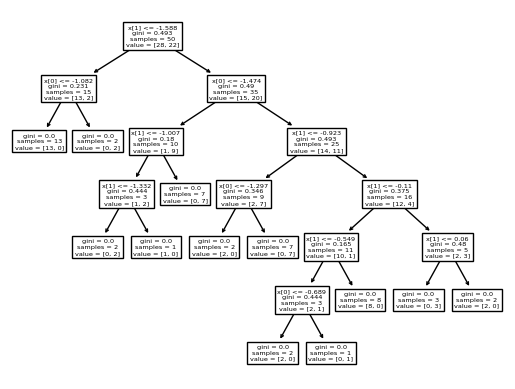

In [48]:
plot_tree(clf3)

In [49]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([1])

In [50]:
clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([1])

In [51]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([1])

In [52]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
89,-1.799117,0.808693,2.430179,1.329875,-4.086374,1
18,2.575105,-1.422594,-0.471283,-1.084148,2.799780,1
3,0.320632,1.586403,0.863114,1.343401,-2.794651,1
37,1.411780,-2.293874,-4.210734,0.091973,-0.346967,0
45,1.099875,0.045360,-0.813658,-2.366850,-2.173310,0
93,1.211573,-0.764994,-1.867489,-1.606700,-1.566335,0
69,-0.710103,-0.813793,0.727963,-0.458231,-0.550094,1
87,1.213441,-2.567583,-0.226220,1.048734,1.493944,0
74,1.755993,-1.897421,-3.669150,0.070017,-0.131384,0
29,-2.316416,-1.398916,2.017657,-0.426381,-1.697828,1
